<a href="https://colab.research.google.com/github/Aiman217/WMU102/blob/main/WMU102_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the project for course WMU102**

Importing all required library for this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Data Collection**

Data is taken from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/version/1


In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-V6dmdaCZaaNdCJ734CAvuNtfqcGhjcg')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Data manipulation (Data Preparation)**

In [4]:
df = df.dropna(how='any',axis=0)

In [5]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [6]:
print(df['gender'].value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


In [7]:
df = df[df.gender != 'Other']

In [8]:
print(df['gender'].value_counts())

Female    2897
Male      2011
Name: gender, dtype: int64


In [9]:
df = df.drop('id', axis=1);

In [10]:
print(df['gender'].dtypes)

object


### One Hot Encoding

Applying one hot encoding to represent categorical dataset in the form of binary vector

In [11]:
def onehot_encode(original_df, feature):
    feature_encode = pd.get_dummies(original_df[[feature]])
    new_df = pd.concat([original_df, feature_encode], axis=1)
    new_df = new_df.drop([feature], axis=1)
    return(new_df)

In [12]:
a = df['gender'].dtypes
print(a == object)

True


In [13]:
feature_to_encode = []
for col in df.columns:
  a = df[col].dtypes
  if a == object:
    feature_to_encode.append(col)

print(feature_to_encode)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [14]:
mod_df = df
for feature in feature_to_encode:
  mod_df = onehot_encode(mod_df, feature)

In [15]:
mod_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


## EDA

In [16]:
print(df['smoking_status'].value_counts())

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


In [17]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [18]:
#getting rid of the outliers 
bmi_outlier_upper_boundary = df['bmi'].mean() + (3 * df['bmi'].std())
df = df[df.bmi < bmi_outlier_upper_boundary]
bmi_outlier_lower_boundary = df['bmi'].mean() - (3 * df['bmi'].std())
df = df[df.bmi > bmi_outlier_lower_boundary]

In [19]:
print(df['stroke'].value_counts())

0    4642
1     208
Name: stroke, dtype: int64


In [20]:
#number of people smoking that got a stroke
df.loc[df['stroke']==1].loc[df['smoking_status'] == 'smokes'].value_counts().sum()

39

In [21]:
##number of formerly  people smoking  that got a stroke
df.loc[df['stroke']==1].loc[df['smoking_status'] == 'formerly smoked'].value_counts().sum()

57

In [22]:
##number of  never smoked people that got a stroke
df.loc[df['stroke']==1].loc[df['smoking_status'] == 'never smoked'].value_counts().sum()

83

In [23]:
##number of unkown  people smoking  that got a stroke
df.loc[df['stroke']== 1 ].loc[df['smoking_status'] == 'Unknown'].value_counts().sum()

29

## **Data Visualization**

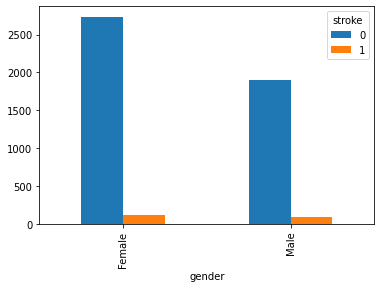

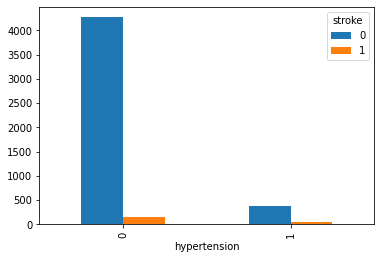

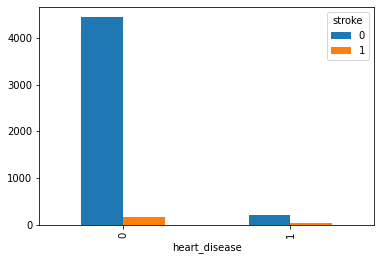

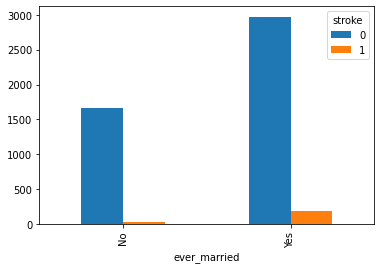

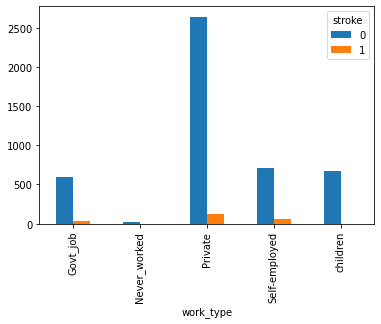

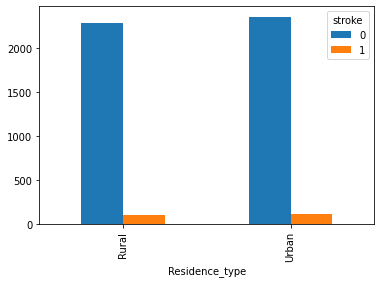

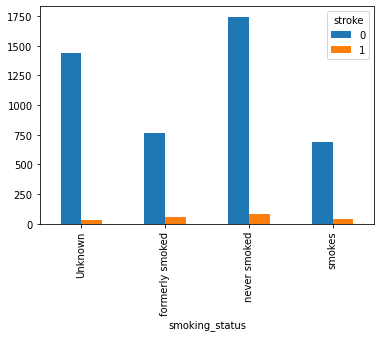

In [24]:
for col in df.columns:
    if col != "stroke" and col!= "id" and col != "age" and col != 'avg_glucose_level' and col != 'bmi':
        df.groupby([col, "stroke"])["stroke"].count().unstack().plot(kind="bar",)

In [25]:
age_groups = ['5-20','21-40','41-60','61-80','80+']
barWidth = 0.25
frequency1 = []
frequency2 = []
frequency1.append(df[df.age > 5][df.age <= 20][df.stroke == 1].value_counts().sum())
frequency2.append(df[df.age > 5][df.age <= 20][df.stroke == 0].value_counts().sum())

min = 21
max = 40
while max <=80 :
    frequency1.append(df[df.age >= min][df.age <= max][df.stroke == 1].value_counts().sum())
    frequency2.append(df[df.age >= min][df.age <= max][df.stroke == 0].value_counts().sum())
    min += 20
    max += 20
print(frequency1)  
frequency1.append(df[df.age > 80][df.stroke == 1].value_counts().sum())
frequency2.append(df[df.age > 80][df.stroke == 0].value_counts().sum())


print(frequency1)

[1, 5, 56, 123]
[1, 5, 56, 123, 23]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7

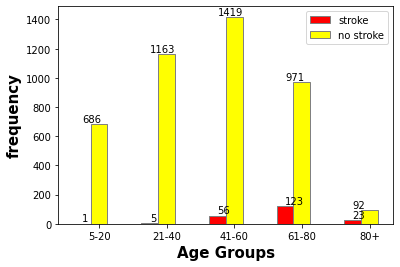

In [26]:
def addlabels(x,y,va = 'bottom'):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],va=va)

br1 = np.arange(len(frequency1))
br2 = [x + barWidth for x in br1]

addlabels(br1,frequency1)
addlabels(br2,frequency2)
# Make the plot
plt.bar(br1, frequency1, color = 'red', width = barWidth,
        edgecolor ='grey', label ='stroke')
plt.bar(br2, frequency2, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='no stroke')

plt.xlabel('Age Groups', fontweight ='bold', fontsize = 15)
plt.ylabel('frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(frequency1))],age_groups)

plt.legend()
plt.show()

In [27]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,42.833427,0.089691,0.049897,105.094631,28.542763,0.042887
std,22.641485,0.285768,0.217754,44.174163,7.149495,0.202622
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.062500,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.665000,27.950000,0.000000
75%,60.000000,0.000000,0.000000,113.325000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,52.300000,1.000000


In [28]:
glucose_levels = ['50-100','101-150','151-200','201-250','251+']

frequency3 = []
frequency4 = []
min = 50
max = 100
while max <=300 :
    frequency3.append(df[df.avg_glucose_level > min][df.avg_glucose_level <= max][df.stroke == 1].value_counts().sum())
    frequency4.append(df[df.avg_glucose_level > min][df.avg_glucose_level <= max][df.stroke == 0].value_counts().sum())
    min += 50
    max += 50
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: 

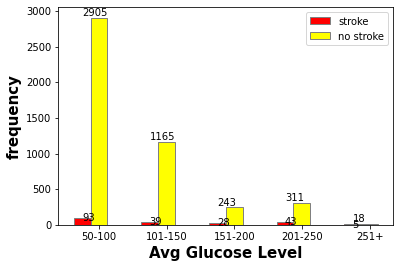

In [29]:
br3 = np.arange(len(frequency3))
br4 = [x + barWidth for x in br3]

addlabels(br3,frequency3, 'center')
addlabels(br4,frequency4)
# Make the plot
plt.bar(br3, frequency3, color = 'red', width = barWidth,
        edgecolor ='grey', label ='stroke')
plt.bar(br4, frequency4, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='no stroke')

plt.xlabel('Avg Glucose Level', fontweight ='bold', fontsize = 15)
plt.ylabel('frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(frequency3))],glucose_levels)

plt.legend()
plt.show()

In [30]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Machine learning**

### **Pipeline**

Applying oversampling and undersampling methods simultaneously with the pipeline

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = mod_df.drop('stroke', axis=1)
y = mod_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=101)

In [33]:
y_train.value_counts()

0    3759
1     167
Name: stroke, dtype: int64

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [35]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [36]:
from imblearn.pipeline import Pipeline

In [37]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [38]:
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [39]:
y_smote.value_counts()

0    750
1    375
Name: stroke, dtype: int64

### **Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_smote, y_smote)

RandomForestClassifier()

In [42]:
y_pred = clf.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9083503054989817


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[881  59]
 [ 31  11]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       940
           1       0.16      0.26      0.20        42

    accuracy                           0.91       982
   macro avg       0.56      0.60      0.57       982
weighted avg       0.93      0.91      0.92       982

